# exploratory notebook
analysing and tracking trends in energy consumption and weather

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
temps = pd.read_csv("Monthly_Average_Highs_and_Lows_6_1948_-_6_2015.csv")

In [28]:
temps['Date'] = pd.to_datetime(temps['Date'])
temps.set_index(['Date'], inplace=True)

In [29]:
temps.sort_values(['Date'], inplace=True)
temps.head()

,Max Temp F,Min Temp F
Date,,
1948-06-01,71.5,49.3
1948-07-01,79.0,55.6
1948-08-01,77.0,55.5
1948-09-01,71.1,44.3
1948-10-01,57.1,31.7


In [79]:
temps = temps["2006-01-01":"2011-12-31"]
temps['Range'] = temps['Max Temp F'] - temps['Min Temp F']
temps['Median'] = temps['Range']/2 + temps['Min Temp F']

In [161]:
temps.tail()

,Max Temp F,Min Temp F,Median,Range
Date,,,,
2011-08-01,77.3,55.4,66.35,21.9
2011-09-01,71.1,52.2,61.65,18.9
2011-10-01,56.3,39.6,47.95,16.7
2011-11-01,51.7,29.5,40.60,22.2
2011-12-01,35.8,17.8,26.80,18.0


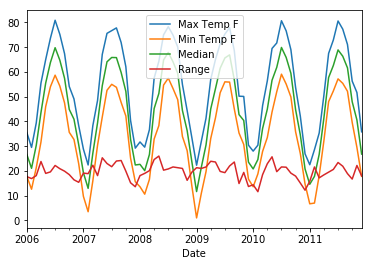

In [82]:
temps.plot();

In [92]:
temps.shape

(72, 4)

In [ ]:
### Searching for Seasonality
As we will be considering changes in climate and how energy usage could be affected by it will first be nessisary to check for trends in the temps we recieved.
The following cells will be used to check for any annual chance in tempurature.

In [176]:
temps_copy = temps

In [179]:
temps_copy['Min Rol'] = temps_copy['Min Temp F'].rolling(window = 12).mean()
temps_copy['Max Rol'] = temps_copy['Max Temp F'].rolling(window = 12).mean()
temps_copy['Stationary Max'] = temps_copy['Max Temp F'] - temps_copy['Max Rol']
temps_copy['Stationary Min'] = temps_copy['Min Temp F'] - temps_copy['Min Rol']

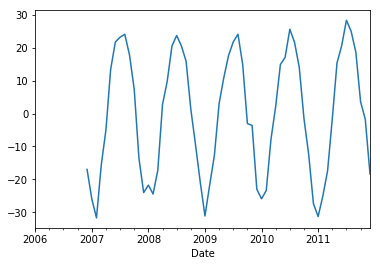

In [180]:
temps_copy['Stationary Max'].plot();

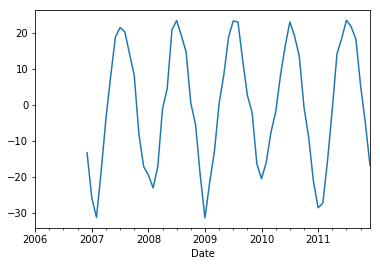

In [181]:
temps_copy['Stationary Min'].plot();

In [ ]:
### The above two plots look very 'wave like' with not much of a trend suggesting that tempuratures have mostly stayed the same for these five years.  Small differences can be found such as 2008 and 2010 have less extreme temps and 2011 has 

In [106]:
idx = pd.DataFrame(temps.index, columns = ['Date'])

In [270]:
energy = pd.read_csv("2006-2011_Town_Energy_Usage_And_Savings.csv")

In [271]:
energy  = energy[energy['TOWN'] == 'MONTPELIER']
# energy['Date'] = energy['Date'].apply(energy['Date'].split(' ')[0])

In [273]:
energy['Date'] = energy['Year'].apply(lambda x : x.split()[0])

In [275]:
energy['Date'] = pd.to_datetime(energy['Date'])
energy['%Savings_as_Float'] = energy['Savings as % of Usage'] * 0.01
energy.head()

,TOWN,Year,kWh Usage: Commercial,kWh Usage: Residential,kWh Savings: Commercial,kWh Savings: Residential,Number of Households,Average Residential kWh Usage/ Household,Average Residential kWh Savings/ Household,Savings as % of Usage,MMBtu Savings: Commercial,MMBtu Savings: Residential,Date,%Savings_as_Float
171,MONTPELIER,01/01/2011 12:00:00 AM,56889842.0,25366180,591986.0,1455218.0,4354,5826.0,334,6.0,295.0,1960.0,2011-01-01,0.06
464,MONTPELIER,01/01/2010 12:00:00 AM,58431419.0,25734114,1577982.0,1510065.0,4390,5862.0,344,6.0,3138.0,2814.0,2010-01-01,0.06
712,MONTPELIER,01/01/2009 12:00:00 AM,56105680.0,27808949,1535823.0,1100560.0,4801,5792.0,229,4.0,2953.0,4073.0,2009-01-01,0.04
960,MONTPELIER,01/01/2008 12:00:00 AM,55623865.0,27935716,1757831.0,2916177.0,4999,5588.0,583,9.0,NaN,NaN,2008-01-01,0.09
1208,MONTPELIER,01/01/2007 12:00:00 AM,56439680.0,28704154,505129.0,1548356.0,4999,5742.0,310,5.0,NaN,NaN,2007-01-01,0.05


In [40]:
energy.shape

(5, 12)

In [162]:
sparse_df = pd.merge(idx, energy, on='Date', how='left')

In [163]:
sparse_df.set_index(['Date'], inplace=True)

In [164]:
sparse_df.columns

Index(['TOWN', 'Year', 'kWh Usage: Commercial', 'kWh Usage: Residential',
       'kWh Savings: Commercial', 'kWh Savings: Residential',
       'Number of Households', 'Average Residential kWh Usage/ Household',
       'Average Residential kWh Savings/ Household', 'Savings as % of Usage',
       'MMBtu Savings: Commercial', 'MMBtu Savings: Residential'],
      dtype='object')

In [165]:
sparse_df.loc['2007-01-01':'2007-01-01']

,TOWN,Year,kWh Usage: Commercial,kWh Usage: Residential,kWh Savings: Commercial,kWh Savings: Residential,Number of Households,Average Residential kWh Usage/ Household,Average Residential kWh Savings/ Household,Savings as % of Usage,MMBtu Savings: Commercial,MMBtu Savings: Residential
Date,,,,,,,,,,,,
2007-01-01,MONTPELIER,01/01/2007 12:00:00 AM,56439680.0,28704154.0,505129.0,1548356.0,4999.0,5742.0,310.0,5.0,NaN,NaN


In [167]:
sparse_df['kWh Commercial in millions'] = sparse_df['kWh Usage: Commercial']/1000000
sparse_df['kWh Residential in millions'] = sparse_df['kWh Usage: Residential']/1000000
sparse_df['Avg Residential kWh usage in thousands'] = sparse_df['Average Residential kWh Usage/ Household']/1000
sparse_df['Avg Residential kWh savings in hundreds'] = sparse_df['Average Residential kWh Savings/ Household']/100
sparse_df['MMBtu Savings: Commercial in thousands'] = sparse_df['MMBtu Savings: Commercial']/1000
sparse_df['MMBtu Savings: Residential in thousands'] = sparse_df['MMBtu Savings: Residential']/1000

In [168]:
sparse_df = sparse_df.bfill()

In [169]:
sparse_df.drop(['Year', 'kWh Usage: Commercial', 'kWh Usage: Residential', 'Average Residential kWh Usage/ Household', 'Average Residential kWh Savings/ Household'], axis=1, inplace=True)

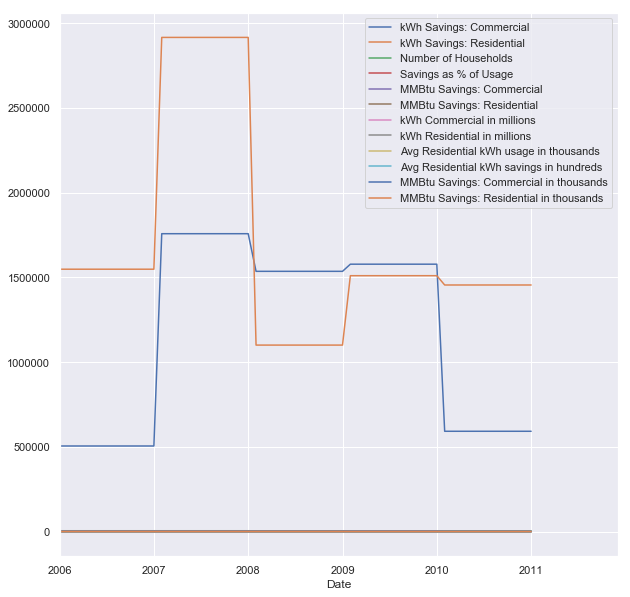

In [257]:
sparse_df.plot(figsize=(10,10));

In [171]:
joined_df = pd.merge(temps, sparse_df, on='Date', how='left')
joined_df.drop(['kWh Savings: Commercial', 'kWh Savings: Residential', 'Number of Households', 'MMBtu Savings: Residential', 'MMBtu Savings: Commercial'], axis=1, inplace=True)
joined_df.dropna(inplace=True)

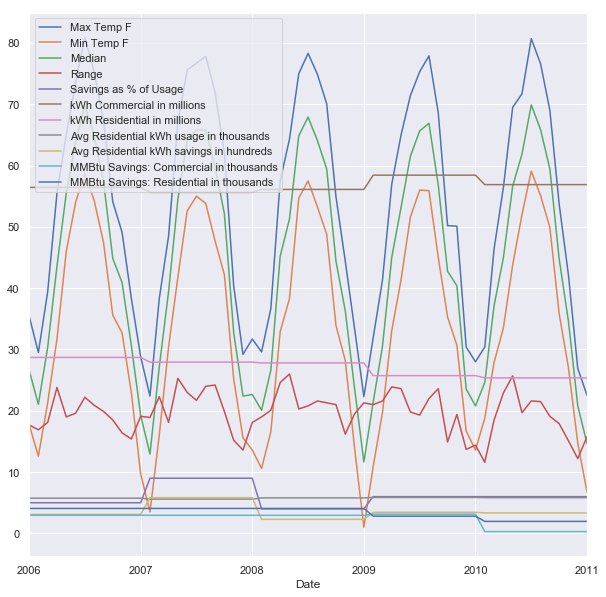

In [258]:
joined_df.plot(figsize=(10,10));

In [ ]:
# things id like to know
# temp should be on a more sensitive scale / 10
# overlay an alpha=.5 bar of the energy data over the temp data
# look at just commercial and residential v temps
# stack commercial and residential (stack savings MM(million) *BTU is equivalent to1.06 Joules) (or take savings % and create a new col)
# ts manipulation of temp data to remove seasonality
# box the energy data into a larger plot of temp data


In [240]:
# overlay houses as line plot as an estimate of population
# group bars to show percent saved alongside
sns.set()
consumption = pd.DataFrame()
consumption['kWh Commercial'] = energy['kWh Usage: Commercial']
consumption['kWh Residential'] = energy['kWh Usage: Residential']
consumption['Date'] = energy['Date']

total_consumption = consumption.apply(lambda x: (x['kWh Commercial'] + x['kWh Residential']), axis=1)
savings = total_consumption * energy['%Savings_as_Float']
consumption['Total Usage'] = total_consumption
consumption['KWh Savings'] = savings
consumption = consumption[::-1]

consumption.head()

,kWh Commercial,kWh Residential,Date,Total Usage,KWh Savings
1208,56439680.0,28704154,2007-01-01,85143834.0,4257191.70
960,55623865.0,27935716,2008-01-01,83559581.0,7520362.29
712,56105680.0,27808949,2009-01-01,83914629.0,3356585.16
464,58431419.0,25734114,2010-01-01,84165533.0,5049931.98
171,56889842.0,25366180,2011-01-01,82256022.0,4935361.32


Text(0, 0.5, 'kWh in Millions')

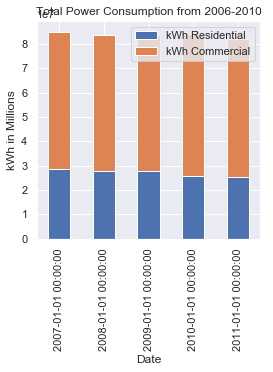

In [249]:
ax = consumption.loc[:,['kWh Residential', 'kWh Commercial', 'Date']].set_index('Date').plot(kind='bar', stacked=True, title='Total Power Consumption from 2006-2010', figsize=(4,4))
ax.set_ylabel('kWh in Millions')

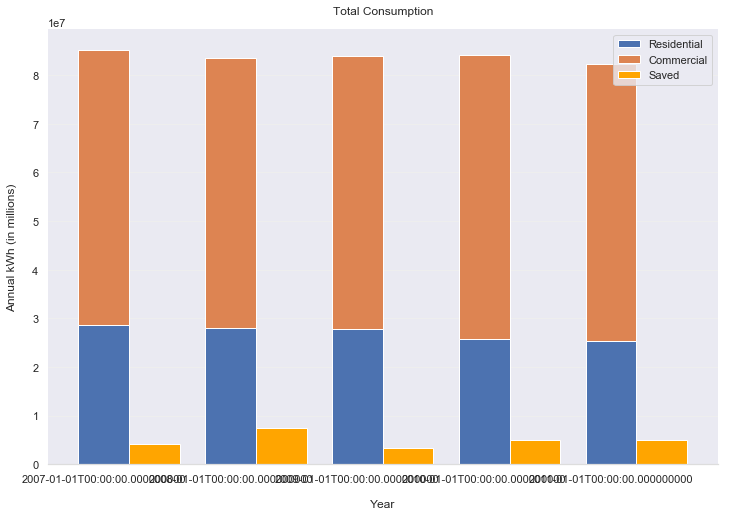

In [316]:
# plot consumption

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(consumption.Date.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4
ind = np.arange(N)    # the x locations for the groups

b1 = ax.bar(x, consumption['kWh Residential'], bar_width)
b2 = ax.bar(x, consumption['kWh Commercial'], bar_width,
             bottom=consumption['kWh Residential'])

ax.set_ylabel('Annual kWh (in millions)', labelpad=15)
ax.set_title('Total Consumption', pad=15)
ax.set_xlabel('Year', labelpad=15)
ax.set_xticks(x)
ax.set_xticklabels(consumption.Date.unique())
ax.legend((b1[0], b2[0], b3[0]), ('Residential', 'Commercial', 'Saved'), loc='best')

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


b3 = ax.bar(x + bar_width, consumption['KWh Savings'],
            width=bar_width, color = 'orange')
plt.show()